In [10]:
import pandas as pd
import numpy as np

In [11]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )

In [ ]:
loan_data.tail(20)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
471,471,LP002556,Male,No,0,Graduate,No,2435,0.0,75.0,360.0,1.0,Urban,0
472,472,LP001516,Female,Yes,2,Graduate,No,14866,0.0,70.0,360.0,1.0,Urban,1
473,473,LP002888,Male,No,0,Graduate,NaN,3182,2917.0,161.0,360.0,1.0,Urban,1
474,474,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,1
475,475,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,1
476,476,LP001963,Male,Yes,1,Graduate,No,2014,2925.0,113.0,360.0,1.0,Urban,0
477,477,LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,1
478,478,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,1
479,479,LP002670,Female,Yes,2,Graduate,No,2031,1632.0,113.0,480.0,1.0,Semiurban,1
480,480,LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,1


In [ ]:
loan_data.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            491 non-null    object 
 4   Dependents         491 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [ ]:
loan_data.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
loan_data.Gender.unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
loan_data.Gender.fillna(loan_data.Gender.mode()[0], inplace=True)

In [ ]:
loan_data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
loan_data.Married.fillna(loan_data.Married.mode()[0], inplace=True)

In [ ]:
loan_data.Dependents.

9

In [ ]:
def fillwithmode(df, columns):
  for column in columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
fillwithmode(loan_data, ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History'])

In [ ]:
loan_data.LoanAmount.fillna(loan_data.LoanAmount.mean(), inplace=True)

In [ ]:
loan_data.Loan_Amount_Term.

360.0    404
180.0     35
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
36.0       2
60.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
loan_data.Credit_History.value_counts()

1.0    380
0.0     68
Name: Credit_History, dtype: int64

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            491 non-null    object 
 4   Dependents         491 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      491 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         491 non-null    float64
 10  Loan_Amount_Term   491 non-null    float64
 11  Credit_History     491 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [ ]:
loan_data.Loan_Status.value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [ ]:
loan_data.Property_Area.value_counts()

Semiurban    186
Urban        155
Rural        150
Name: Property_Area, dtype: int64

In [13]:
pd.get_dummies(loan_data.Property_Area)

,Rural,Semiurban,Urban
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
486,0,0,1
487,1,0,0
488,1,0,0
489,0,0,1


In [12]:
X = loan_data.drop(columns=['Loan_ID', 'Loan_Status'])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban
487,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural
488,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban


In [ ]:
X.Credit_History.value_counts()

1.0    423
0.0     68
Name: Credit_History, dtype: int64

In [ ]:
loan_data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.097735,0.582159,-0.058443,-0.031970,0.000313
CoapplicantIncome,-0.097735,1.000000,0.190413,-0.070323,0.001362,-0.054240
LoanAmount,0.582159,0.190413,1.000000,0.037947,-0.012102,-0.025121
Loan_Amount_Term,-0.058443,-0.070323,0.037947,1.000000,-0.008757,-0.006096
Credit_History,-0.031970,0.001362,-0.012102,-0.008757,1.000000,0.533285
Loan_Status,0.000313,-0.054240,-0.025121,-0.006096,0.533285,1.000000


In [ ]:
import seaborn as sns

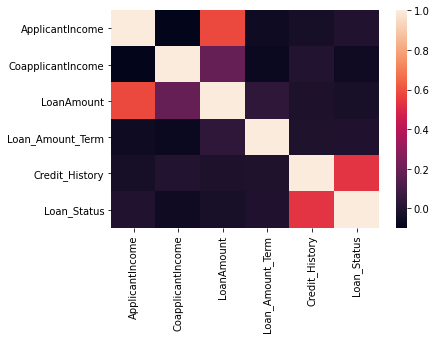

In [ ]:
sns.heatmap(loan_data.corr())

In [ ]:
X.merge(pd.get_dummies(loan_data.Property_Area), left_index=True, right_index=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Rural,Semiurban,Urban
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,0,1,0
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1,0,0
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0,0,1
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,0,0,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,0,0,1
487,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1,0,0
488,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1,0,0
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0,0,1


In [ ]:
def merge_dummies(df, columns):
  for column in columns:
    df = df.merge(pd.get_dummies(df[column]), left_index=True, right_index=True)
  return df

In [ ]:
X = merge_dummies(X, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,No_x,Yes_x,0,1,2,3+,Graduate,Not Graduate,No_y,Yes_y,Rural,Semiurban,Urban
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
487,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
488,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [ ]:
X.drop(columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], inplace=True)

In [ ]:
X.rename(columns={'No_x': 'Not_Married', 'Yes_x': 'Married', 'No_y': 'Not_Self_Employed', 'Yes_y': 'Self_Employed'}, inplace=True)

In [ ]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Not_Married,Married,0,1,2,3+,Graduate,Not Graduate,Not_Self_Employed,Self_Employed,Rural,Semiurban,Urban
0,4547,0.0,115.0,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
1,5703,0.0,130.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0
2,4333,2451.0,110.0,360.0,1.0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
3,4695,0.0,96.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,6700,1750.0,230.0,300.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,9833,1833.0,182.0,180.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
487,3812,0.0,112.0,360.0,1.0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
488,14583,0.0,185.0,180.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
489,1836,33837.0,90.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [ ]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Female', 'Male', 'Not_Married',
       'Married', '0', '1', '2', '3+', 'Graduate', 'Not Graduate',
       'Not_Self_Employed', 'Self_Employed', 'Rural', 'Semiurban', 'Urban'],
      dtype='object')

In [ ]:
X.drop(columns=[12.0, 36.0, 84.0, 120.0], inplace=True)

In [ ]:
X.columns

Index([  'ApplicantIncome', 'CoapplicantIncome',        'LoanAmount',
                  'Female',              'Male',       'Not_Married',
                 'Married',                 '0',                 '1',
                       '2',                '3+',          'Graduate',
            'Not Graduate', 'Not_Self_Employed',     'Self_Employed',
                      60.0,               180.0,               240.0,
                     300.0,               360.0,               480.0,
                       0.0,                 1.0,             'Rural',
               'Semiurban',             'Urban'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    491 non-null    int64  
 1   CoapplicantIncome  491 non-null    float64
 2   LoanAmount         491 non-null    float64
 3   Female             491 non-null    uint8  
 4   Male               491 non-null    uint8  
 5   Not_Married        491 non-null    uint8  
 6   Married            491 non-null    uint8  
 7   0                  491 non-null    uint8  
 8   1                  491 non-null    uint8  
 9   2                  491 non-null    uint8  
 10  3+                 491 non-null    uint8  
 11  Graduate           491 non-null    uint8  
 12  Not Graduate       491 non-null    uint8  
 13  Not_Self_Employed  491 non-null    uint8  
 14  Self_Employed      491 non-null    uint8  
 15  12.0               491 non-null    uint8  
 16  36.0               491 non

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y = loan_data['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy_score(rf.predict(X_test), y_test)

0.7676767676767676

In [ ]:
f1_score(rf.predict(X_test), y_test)

0.8413793103448275

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [ ]:
fillwithmode(test_data,['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History'])
test_data.LoanAmount.fillna(test_data.LoanAmount.mean(), inplace=True)
test_data = merge_dummies(test_data, ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])
test_data.drop(columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], inplace=True)
test_data.rename(columns={'No_x': 'Not_Married', 'Yes_x': 'Married', 'No_y': 'Not_Self_Employed', 'Yes_y': 'Self_Employed'}, inplace=True)

In [ ]:
test_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Not_Married,Married,0,1,2,3+,Graduate,Not Graduate,Not_Self_Employed,Self_Employed,Rural,Semiurban,Urban
0,3748,1668.0,110.00000,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0
1,4000,7750.0,290.00000,360.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2,2625,6250.0,187.00000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
3,3902,1666.0,109.00000,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0
4,6096,0.0,218.00000,360.0,0.0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4683,1915.0,185.00000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
119,3601,1590.0,152.08547,360.0,1.0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
120,3017,663.0,102.00000,360.0,1.0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0
121,17263,0.0,225.00000,360.0,1.0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0


In [ ]:
predictions = rf.predict(test_data)

In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

In [ ]:
predictions_df

,prediction
0,1
1,1
2,1
3,1
4,0
...,...
118,1
119,1
120,1
121,0


In [ ]:
predictions_df.to_csv('predictions.csv', index=False)

In [2]:
import pickle

In [ ]:
pkl_file = 'pickle_model.pkl'

with open(pkl_file, 'wb') as file:
  pickle.dump(rf, file)

In [3]:
pkl_file = 'pickle_model.pkl'
with open(pkl_file, 'rb') as file:
  pickled_model = pickle.load(file)

pickled_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
f1_score(pickled_model.predict(X_test), y_test)

0.8413793103448275

In [6]:
import numpy as np

In [ ]:
pickled_model.predict(X_test)

In [ ]:
import json
columns = {
    'data_columns': [col.lower() for col in loan_data.drop(columns=['Loan_ID', 'Loan_Status']).columns]
}
with open('columns.json', 'w') as f:
  f.write(json.dumps(columns))

In [ ]:
loan_data.drop(columns=['Loan_ID', 'Loan_Status']).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')